In [1]:
import os
from shutil import rmtree
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addAtomIndices=True
from tqdm import tqdm
import numpy as np
import pandas as pd

from serenityff.torsion.tree.dash_tree import DASHTorsionTree
from serenityff.charge.tree.atom_features import AtomFeatures
from serenityff.torsion.tree_develop.tree_constructor import Torsion_tree_constructor

In [2]:
data_file="../data/example_extraction.csv"
sdf_suply="../data/example.sdf" 
data_split = 0.2
out_folder = "./example_tree_out"
if os.path.exists(out_folder):
    rmtree(out_folder)
os.mkdir(out_folder)

In [3]:
mol_supplier = Chem.SDMolSupplier(sdf_suply, removeHs=False)
df_test = pd.read_csv(data_file)

In [4]:
df_test.groupby("mol_index").groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 1: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 2: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], 3: [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], 4: [79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94], 5: [95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121], 6: [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141], 7: [142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 8: [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196], 9: [197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

In [5]:
tree_constructor = Torsion_tree_constructor(df_path=data_file,
                sdf_suplier=sdf_suply,
                num_layers_to_build=16,
                data_split=data_split,
                verbose=True,
                sanitize=True,
                sanitize_charges=True)

2024-01-16 14:04:29.369132	Initializing Tree_constructor
2024-01-16 14:04:29.369970	Mols imported, starting df import
2024-01-16 14:04:29.375229	Sanitizing
2024-01-16 14:04:29.383873	Check charge sanity


100%|██████████| 20/20 [00:00<00:00, 4412.50it/s]

Number of wrong charged mols: 0 of 20 mols
2024-01-16 14:04:29.391695	df imported, starting data spliting
2024-01-16 14:04:29.392534	Splitting data
2024-01-16 14:04:29.394144	Data split, delete original
2024-01-16 14:04:29.404828	Starting table filling



100%|██████████| 334/334 [00:00<00:00, 5318.90it/s]

2024-01-16 14:04:29.473496	Table filled, starting adjacency matrix creation


Creating Adjacency matrices:


100%|██████████| 20/20 [00:00<00:00, 3487.55it/s]

Number of train mols: 16
Number of test mols: 4
2024-01-16 14:04:29.483395	Charge constructor build, creating torsion df
{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 2: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 4: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 5: [53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 6: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 9: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125], 10: [126, 127, 128, 129, 130, 131, 132], 11: [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], 12: [147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174], 13: [175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 

DF mol =    atomtype  idx_in_mol  mol_index  \
37        O           0          4   
38        C           1          4   
39        O           2          4   
40        C           3          4   
41        C           4          4   
42        C           5          4   
43        C           6          4   
44        C           7          4   
45        S           8          4   
46        N           9          4   
47        O          10          4   
48        H          11          4   
49        H          12          4   
50        H          13          4   
51        H          14          4   
52        H          15          4   

                                      node_attentions   truth  h_connectivity  \
37  [0.09666504989480514, 0.05770170994428208, 0.0... -0.5933              -1   
38  [0.09137456440629572, 0.09489896776860268, 0.0...  0.7849              -1   
39  [0.05886057256958524, 0.05737895440170713, 0.0... -0.6431              -1   
40  [0.0605348078041

In [6]:
tree_constructor.df

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
2,O,0,1,"[0.08731412076250168, 0.07575401684894212, 0.0...",-0.484899,-1,"[2, 1, 3, 4]",0.599979,156553111
3,C,1,1,"[0.07533094601506285, 0.07949683829561092, 0.0...",0.000381,-1,"[3, 8, 7, 6]",0.392914,49436500
8,N,2,1,"[0.0760680088577648, 0.07624203235535834, 0.07...",-0.000414,-1,"[8, 7, 6, 5]",0.614799,100276857
7,C,3,1,"[0.07952590797072513, 0.0767484929016264, 0.07...",-0.000025,-1,"[7, 6, 5, 4]",0.387219,49849837
6,C,4,1,"[0.07947201368734608, 0.07641943049244446, 0.0...",0.000456,-1,"[6, 5, 4, 3]",0.357515,49849836
...,...,...,...,...,...,...,...,...,...
309,C,2,19,"[0.03662447512365832, 0.037163860413569255, 0....",-0.490934,-1,"[2, 3, 4, 5]",0.36673,60418214
310,C,3,19,"[0.035285019837321366, 0.03745373971211091, 0....",-0.189262,-1,"[3, 4, 5, 6]",0.369222,151195731
313,O,4,19,"[0.029042437193256325, 0.040045953766984284, 0...",-0.007612,-1,"[6, 5, 7, 8]",0.60137,151194993
312,C,5,19,"[0.019444394729595877, 0.030420347852354694, 0...",0.498968,-1,"[5, 7, 8, 9]",0.340875,58512325


In [7]:
tree_constructor.create_tree_level_0()

Preparing Dataframe:
Number of unique atom features in df: 92
Creating Tree Level 0:


100%|██████████| 92/92 [00:00<00:00, 3100.15it/s]

2024-01-16 14:04:30.407919	Layer 0 done


In [8]:
tree_constructor.build_tree(num_processes=1)

AF=156553111 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=80, 1, 4]
AF 156553111 done
AF=49436500 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=26, 0, 4]
AF 49436500 done
AF=100276857 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=27, 3, 4]
AF 100276857 done
AF=49849837 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=26, 3, 4]
AF 49849837 done
AF=49849836 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=55, 3, 4]
AF 49849836 done
AF=100276735 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=27, 0, 4, node --- lvl: 2, Num=1, fp=65, 0, 4]
AF 100276735 done
AF=49849715 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=26, 1, 4]
AF 49849715 done
AF=100269028 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=26, 2, 4]
AF 100269028 done
AF=48483924 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=85, 0, 4]
AF 48483924 done
AF=101139978 - Layer 1 done
children layer 1: [node ---

In [9]:
print(tree_constructor.root.children[26])
print(tree_constructor.root.children[26].children)

node --- lvl: 1, Num=1, fp=120326337, -1, -1
[node --- lvl: 2, Num=1, fp=34, 1, 1]


In [10]:
print(type(tree_constructor.root.children[26]))
print(type(tree_constructor.root.children[26].children[0]))

<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>
<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>


In [11]:
tree_constructor.convert_tree_to_node(tree_folder_path="./example_tree_out")

Saving DASH tree data to 92 files in ./example_tree_out


  0%|          | 0/92 [00:00<?, ?it/s]

/home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py:145: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['histogram'], dtype='object')]

  self.data_storage[branch_idx].to_hdf(df_path, key="df", mode="w")
100%|██████████| 92/92 [00:01<00:00, 52.76it/s]


In [12]:
tr = tree_constructor.new_tree

<Axes: >

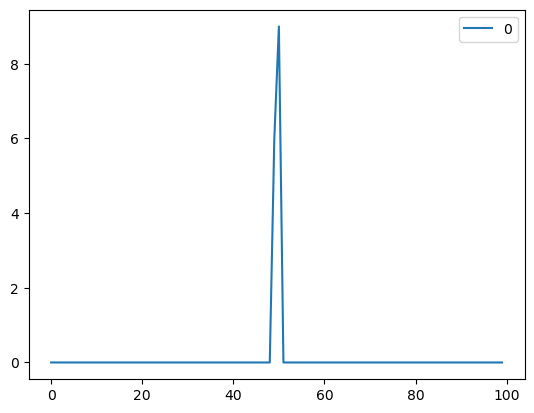

In [13]:
pd.DataFrame(tr.data_storage[49432962].iloc[0].histogram).plot()

In [14]:
example_tree = DASHTorsionTree(tree_folder_path="./example_tree_out")

Loading DASH tree data
Loaded 92 trees and data


In [15]:
for branch in example_tree.tree_storage:
    if len(example_tree.tree_storage[branch]) > 1:
        print(f"Branch {branch} has {len(example_tree.tree_storage[branch])} nodes")

Branch 154738000 has 17 nodes
Branch 50668334 has 8 nodes
Branch 47617114 has 9 nodes
Branch 118420425 has 15 nodes
Branch 100266708 has 10 nodes
Branch 100269028 has 9 nodes
Branch 118852060 has 10 nodes
Branch 116709381 has 10 nodes
Branch 145673029 has 8 nodes
Branch 49433084 has 96 nodes
Branch 49433085 has 46 nodes
Branch 48483924 has 9 nodes
Branch 60403324 has 19 nodes
Branch 114878764 has 8 nodes
Branch 154738122 has 10 nodes
Branch 49849837 has 6 nodes
Branch 59331560 has 17 nodes
Branch 154752269 has 10 nodes
Branch 202054268 has 4 nodes
Branch 62233934 has 10 nodes
Branch 145658882 has 10 nodes
Branch 60418214 has 8 nodes
Branch 58601506 has 8 nodes
Branch 140866208 has 2 nodes
Branch 145658761 has 4 nodes
Branch 100845836 has 10 nodes
Branch 59048880 has 8 nodes
Branch 155168898 has 9 nodes
Branch 58504516 has 17 nodes
Branch 47692266 has 9 nodes
Branch 151209783 has 10 nodes
Branch 114892794 has 8 nodes
Branch 100262683 has 5 nodes
Branch 149379883 has 15 nodes
Branch 4984

In [16]:
mol_idx_test = tree_constructor.test_df.mol_index.unique().tolist()

In [17]:
tree_constructor.df.head()

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
2,O,0,1,"[0.08731412076250168, 0.07575401684894212, 0.0...",-0.484899,-1,"[2, 1, 3, 4, 0, 8, 7, 6, 5]",0.599979,156553111
3,C,1,1,"[0.07533094601506285, 0.07949683829561092, 0.0...",0.000381,-1,"[3, 8, 7, 6, 1, 4, 0, 2, 5]",0.392914,49436500
8,N,2,1,"[0.0760680088577648, 0.07624203235535834, 0.07...",-0.000414,-1,"[8, 7, 6, 5, 4, 3, 1, 0, 2]",0.614799,100276857
7,C,3,1,"[0.07952590797072513, 0.0767484929016264, 0.07...",-0.000025,-1,"[7, 6, 5, 4, 3, 8, 1, 0, 2]",0.387219,49849837
6,C,4,1,"[0.07947201368734608, 0.07641943049244446, 0.0...",0.000456,-1,"[6, 5, 4, 3, 8, 1, 0, 2, 7]",0.357515,49849836


In [18]:
from serenityff.torsion.tree.dash_utils import get_canon_torsion_feature

In [19]:
af1, af2, af3, af4 = [AtomFeatures.atom_features_from_molecule(mol_supplier[0], atom_i) for atom_i in [2, 1, 3, 4]]

In [20]:
print(af1, af2, af3, af4)

26 65 80 66


In [21]:
get_canon_torsion_feature(af1, af2, af3, af4)

121044644

In [22]:
matched_node_path = example_tree.match_new_atom(atom=[2, 1, 3, 4], mol=mol_supplier[1])

In [23]:
matched_node_path

[156553111, 0, 1, 2, 3, 4, 5]

In [24]:
example_tree.get_atom_properties(matched_node_path=matched_node_path)

level                                                            6
atom_type                                                       55
con_atom                                                         3
con_type                                                         4
max_attention                                             0.070568
size                                                             1
histogram        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 5, dtype: object

In [25]:
rmtree(out_folder)